<a href="https://colab.research.google.com/github/Armaqanal/data_analysis/blob/main/face_unlock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

In [ ]:
img1 = plt.imread("face_reference.png")
img2 = plt.imread("face_input.png")
print(img1.shape, img2.shape)

(750, 750, 4) (1084, 626, 4)


Grayscale

In [ ]:
def img2gray(img):
  gray= np.dot(img[...,:3],[0.299, 0.587, 0.114])
  alpha= img[...,3]/255.0
  alpha_color=gray* alpha + 255 * (1-alpha)
  return np.rint(alpha_color).clip(0,255)


gray_white=img2gray(img1)
gray_white = img2gray(img2)

# plt.subplot(1, 2, 1)
# plt.imshow(gray_white,cmap='gray')

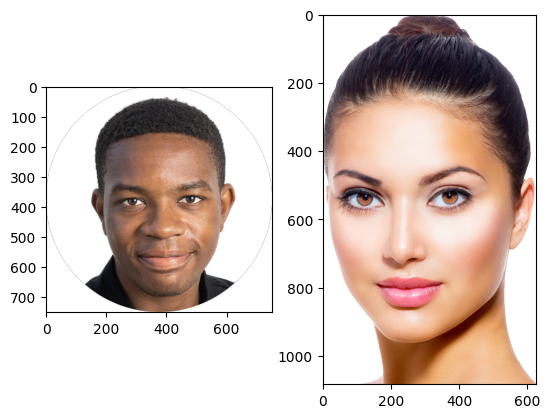

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(img1)

plt.subplot(1, 2, 2)
plt.imshow(img2)

RESIZING

In [ ]:
h1, w1 = img1.shape[:2]
h2, w2 = img2.shape[:2]
taget_height=max(h1,h2)
taget_weight=max(w1,w2)

firstresized =  cv2.resize(img1,(taget_height,taget_weight))
secondresized =  cv2.resize(img2,(taget_height,taget_weight))

print(firstresized.shape)
print(secondresized.shape)

(750, 1084, 4)
(750, 1084, 4)


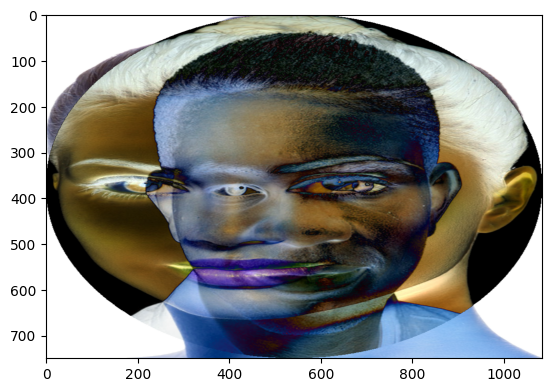

In [ ]:
diff = cv2.absdiff(firstresized, secondresized)
plt.imshow(cv2.cvtColor(diff, cv2.COLOR_BGR2RGB))
plt.show()

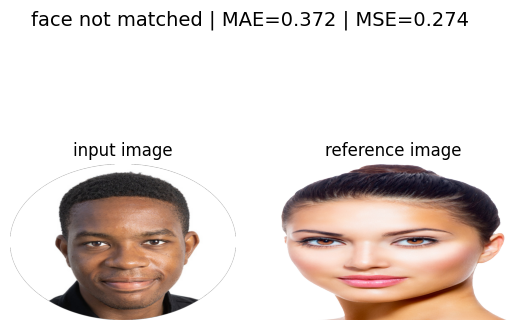

In [ ]:
def calculate_mse_mae(img1, img2, mae_threshold=0.2, mse_threshold=0.1):
    mae = np.mean(np.abs(img1 - img2))
    mse = np.mean((img1 - img2) ** 2)

    if mae < mae_threshold and mse < mse_threshold:
        match = "face matched"
    else:
        match = "face not matched"

    plt.subplot(1, 2, 1)
    plt.imshow(img1)
    plt.title("input image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(img2)
    plt.title("reference image")
    plt.axis("off")

    plt.suptitle(f"{match} | MAE={mae:.3f} | MSE={mse:.3f}", fontsize=14)

    plt.show()

calculate_mse_mae(firstresized,secondresized)

       image         mse
0  test1.png  105.724375
1  test2.png    0.000000
2  test3.png   70.069514


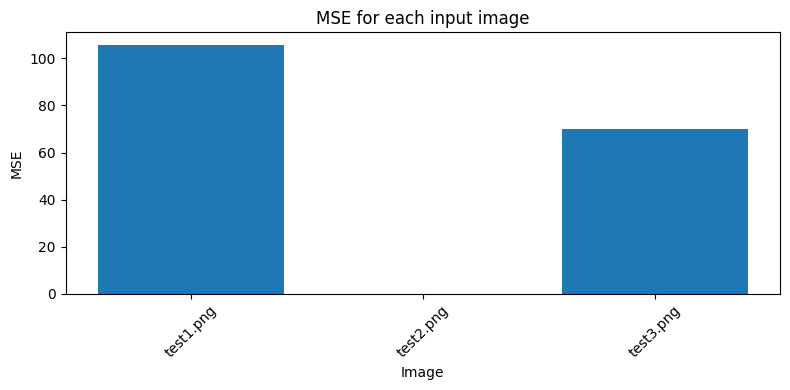

In [ ]:
reference_img = cv2.imread("face_reference.png", cv2.IMREAD_GRAYSCALE)
reference_img = cv2.resize(reference_img, (120, 120))

input_images = [
   "test1.png",
   "test2.png",
   "test3.png"]


image_data = []

for path in input_images:
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (120, 120))

    mse = np.mean((reference_img - img) ** 2)

    image_data.append({
        "image": path,
        "mse": mse
    })

df = pd.DataFrame(image_data)
print(df)

plt.figure(figsize=(8, 4))
plt.bar(df["image"], df["mse"])
plt.title("MSE for each input image")
plt.xlabel("Image")
plt.ylabel("MSE")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()